In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [3]:
# Checking for missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

Text(0.5, 1.0, 'Heatmap of the data')

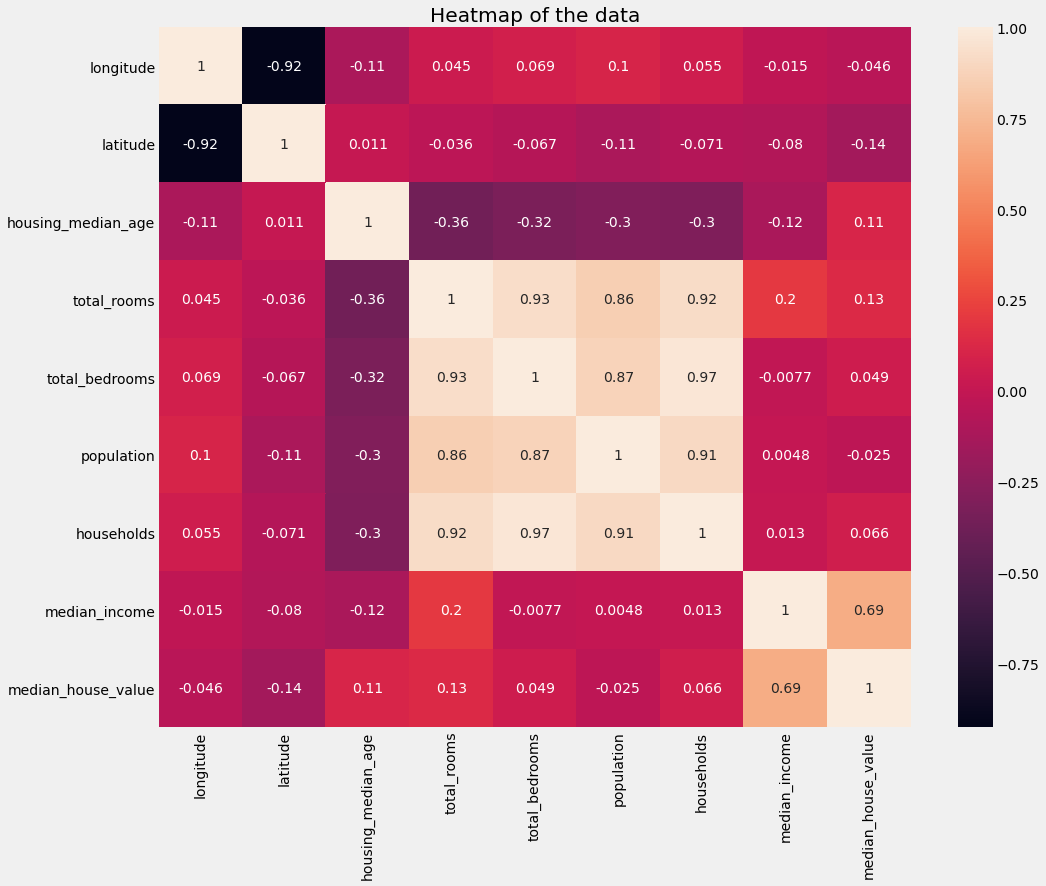

In [5]:
# Basic EDA
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True).set_title('Heatmap of the data')

Text(0.5, 1.0, 'Distribution of median income')

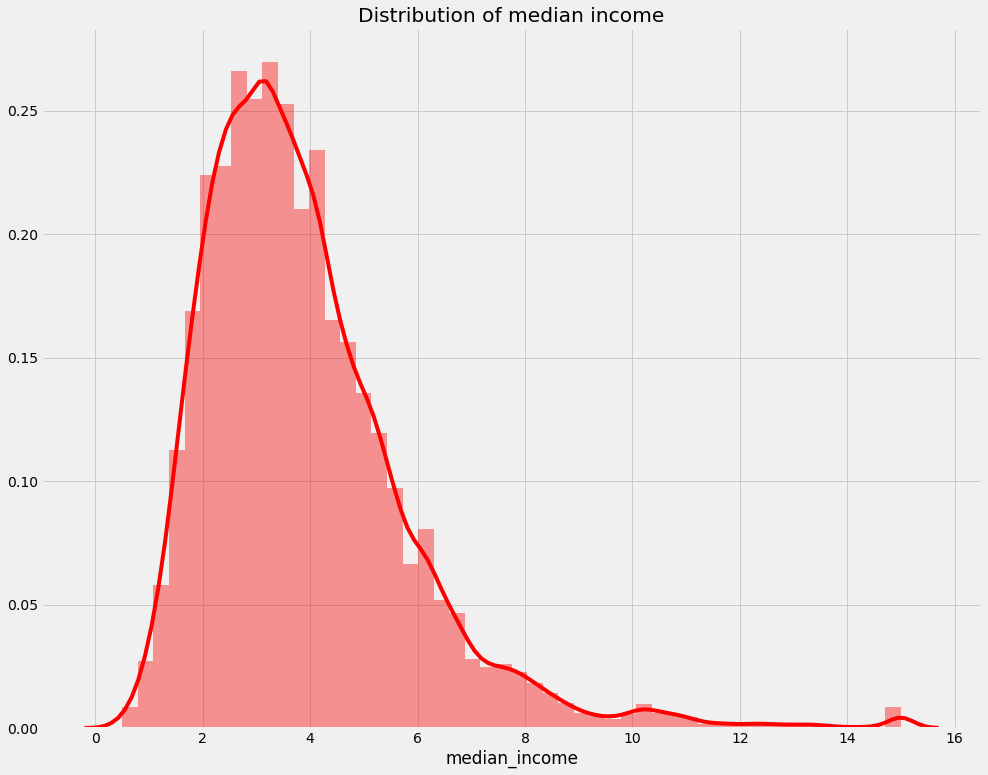

In [6]:
plt.figure(figsize=(15,12))
sns.distplot(data['median_income'], color='red').set_title('Distribution of median income')

Text(0.5, 1.0, 'Distribution of the median house value')

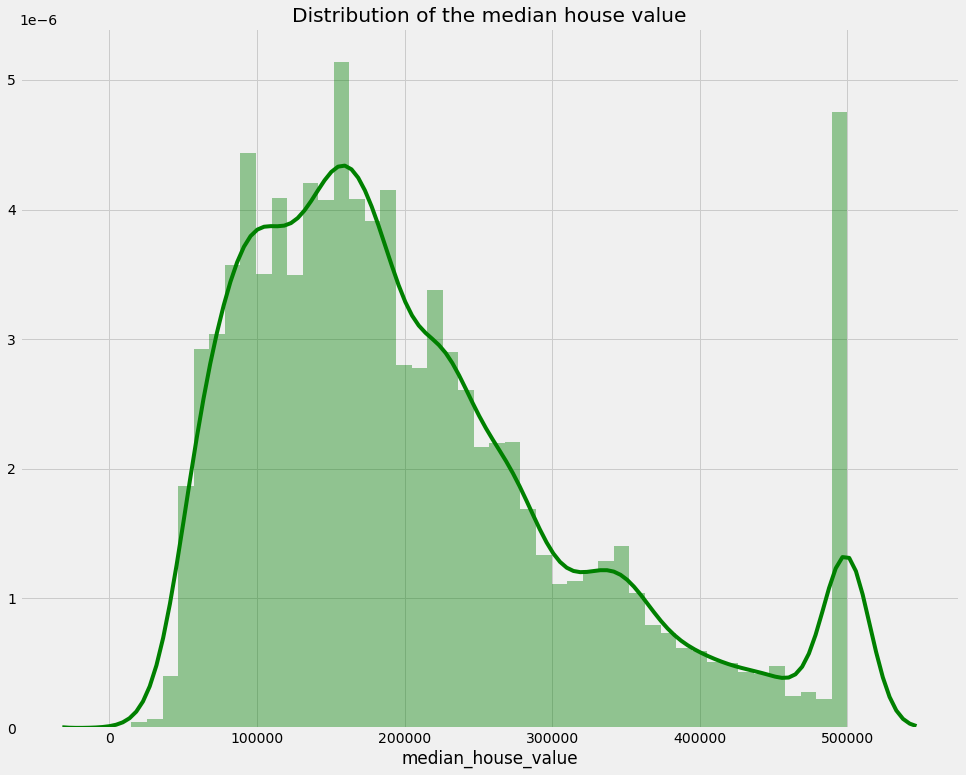

In [7]:
plt.figure(figsize=(15,12))
sns.distplot(data['median_house_value'], color='green').set_title('Distribution of the median house value')

Text(0.5, 1.0, 'Houses age over ocean proximity')

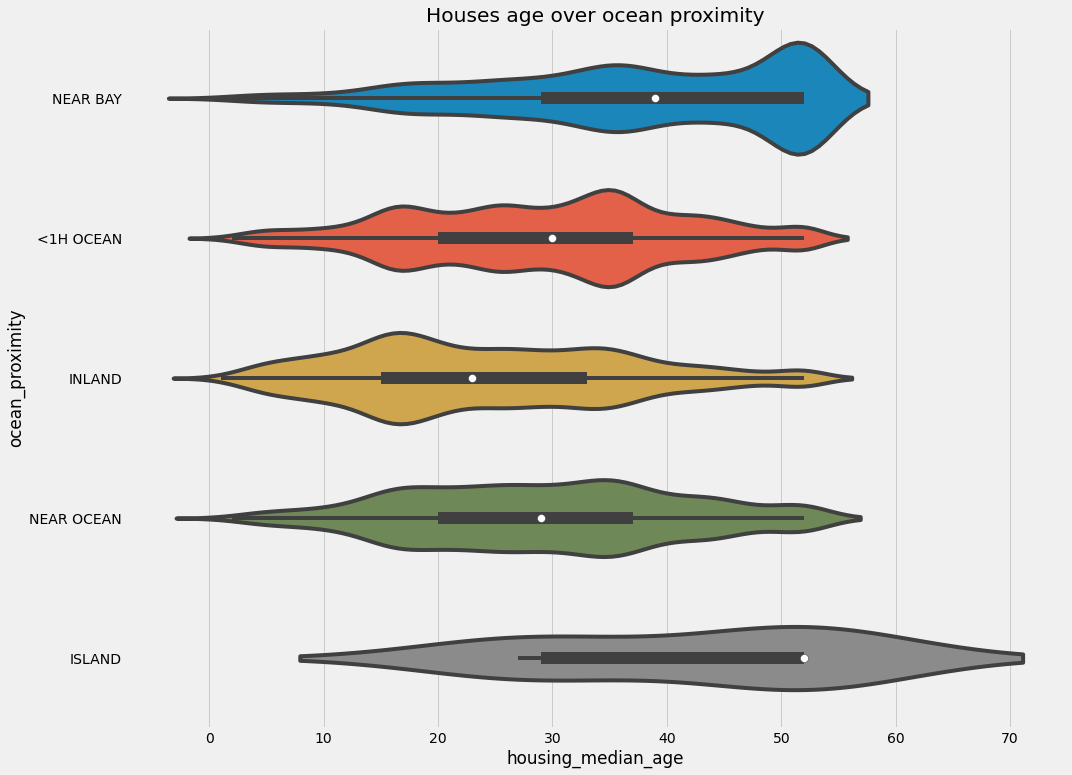

In [8]:
plt.figure(figsize=(15,12))
sns.violinplot(data['housing_median_age'], data['ocean_proximity']).set_title('Houses age over ocean proximity')

Text(0.5, 1.0, 'Houses value based on location')

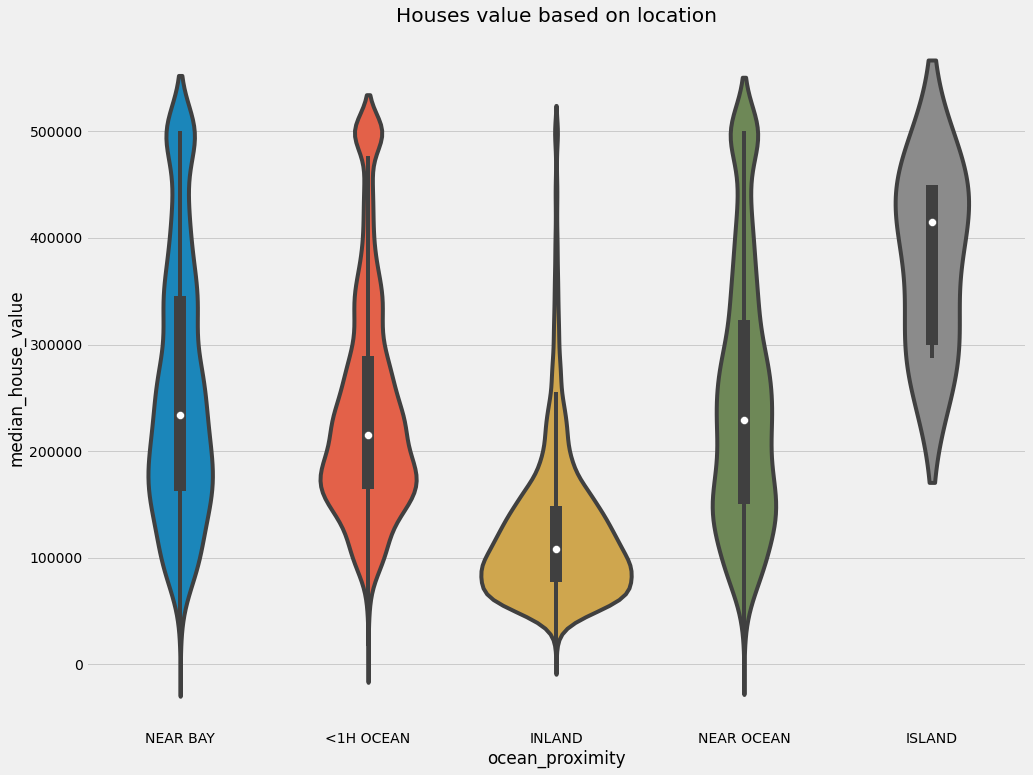

In [9]:
plt.figure(figsize=(15,12))
sns.violinplot(data['ocean_proximity'], data['median_house_value']).set_title('Houses value based on location')

Text(0.5, 1.0, 'Count of ocean proximity')

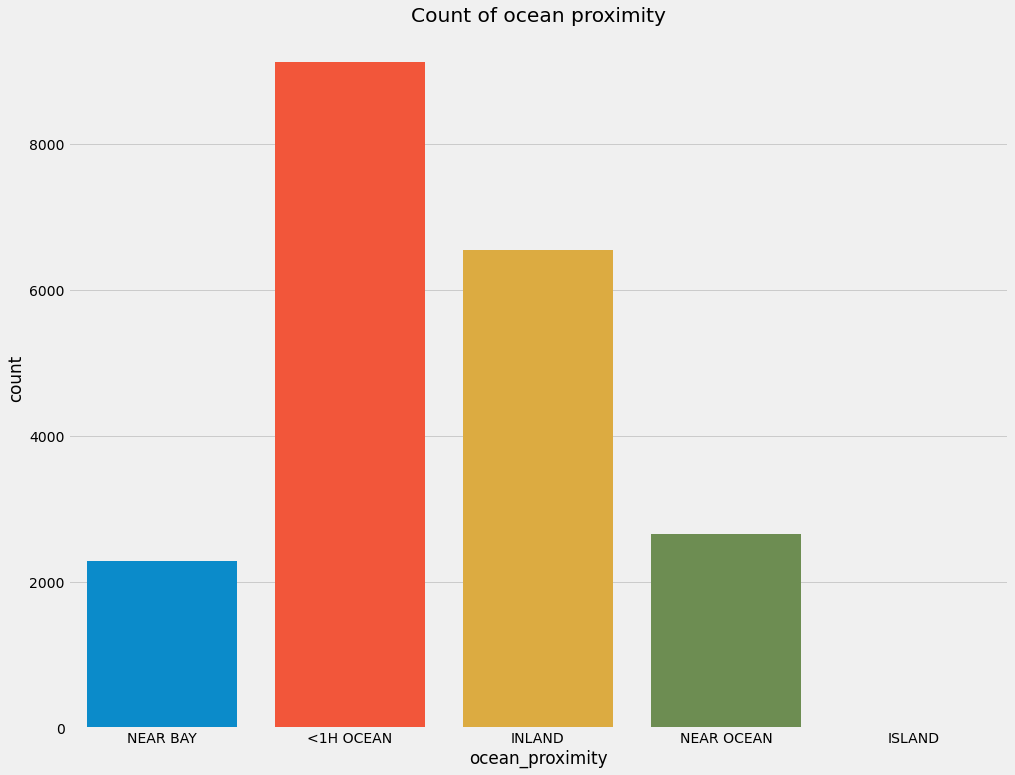

In [10]:
plt.figure(figsize=(15,12))
sns.countplot(data['ocean_proximity'], saturation=0.9).set_title('Count of ocean proximity')

In [11]:
# Dropping low correlated columns
data = data.drop(['longitude', 'latitude'], 1)


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('encoder', OneHotEncoder(), [7])], remainder='passthrough')
data = ct.fit_transform(data)

data = pd.DataFrame(data)

data = data.iloc[:, 1:]

data.head()

,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,0.0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,0.0,0.0,1.0,0.0,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,0.0,0.0,1.0,0.0,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,0.0,0.0,1.0,0.0,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,0.0,0.0,1.0,0.0,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [13]:
# Splitting to X and y
X = data.iloc[:, 0:10].values
y = data.iloc[:, 10].values

In [14]:
# Splitting to training and testing set
from sklearn.model_selection import KFold
kf = KFold()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
    
print(f'X_train shape {X_train.shape}')
print(f'Y_train shape {Y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'Y_test shape {Y_test.shape}')

X_train shape (16512, 10)
Y_train shape (16512,)
X_test shape (4128, 10)
Y_test shape (4128,)


In [15]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

estimators  = [LinearRegression(), DecisionTreeRegressor(),
              DecisionTreeRegressor(), XGBRegressor()]

for model in estimators:
    model.fit(X_train, Y_train)
    accuracy = model.score(X_test, Y_test)
    
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    
    print(f'{model} Accuracy: {accuracy}')
    print(f'{model} MSE: {mse}')

LinearRegression() Accuracy: 0.6712980989096939
LinearRegression() MSE: 4789707800.842321
DecisionTreeRegressor() Accuracy: 0.44953477242140305
DecisionTreeRegressor() MSE: 8021151036.486676
DecisionTreeRegressor() Accuracy: 0.44011685254678656
DecisionTreeRegressor() MSE: 8158385059.598595
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) Accuracy: 0.6909874454632899
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, cols